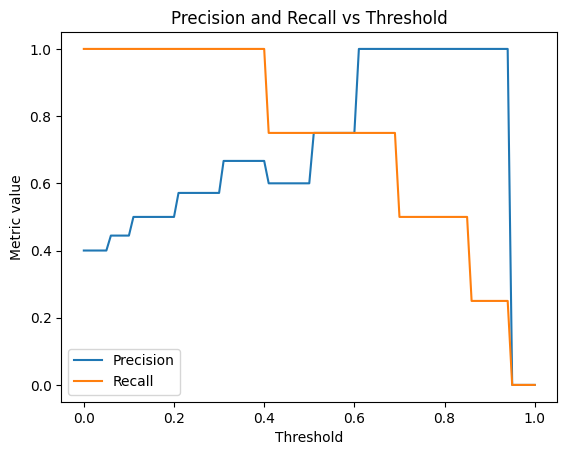

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ground truth: 1 = positive, 0 = negative
y_true = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# Continuous scores produced by the model
y_score = np.array([0.95, 0.85, 0.70, 0.40, 0.60, 0.50, 0.30, 0.20, 0.10, 0.05])

def precision_recall(threshold):
    # Convert scores into binary predictions
    y_pred = (y_score >= threshold).astype(int)

    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    precision = tp / (tp + fp) if tp + fp > 0 else 0.0
    recall = tp / (tp + fn) if tp + fn > 0 else 0.0

    return precision, recall

# Sweep thresholds from 0% to 100%
thresholds = np.linspace(0, 1, 101)
precisions = []
recalls = []

for t in thresholds:
    p, r = precision_recall(t)
    precisions.append(p)
    recalls.append(r)

# Plot
plt.figure()
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.show()
